# 7.3.1 Lineare Prozessmodelle (instationär)
## beheizter Rührkessel (wie Übung 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definition der Funktion(en)

Die Aufgabenstellung ist exakt die gleiche wie die in Ü1. Allerdings wird ein anderer Lösungsweg dargestellt. In Ü1 wurde auf dem Papier analytisch integriert und so eine Gleichung für das bestimmte Integral ermittelt, die mehrfach angewendet wird.
Hier wird iterativ statt analytisch gelöst. 

**(1):** Der Startwert von ```T``` wird beginnend bei ```T_0``` sukzessive erhöht, wobei die differentielle Gleichung Skript (7-5) bzw. Lsg. Ü1 (1.1) über die Schrittweite ```delta_t``` linearisiert betrachtet wird.





**(2):** Die Schleife nimmt sich den aktuellen T-Wert aus der Liste über ```T_list[i]``` und schreibt den neuen Wert in den darauffolgenden leeren Platz über ```T_list[i+1]```. 
- Daher muss die Schleife beim vorletzten Eintrag mit dem Index ```(len(T_list)-2)``` beenden.
- ```range(n)``` ist ein schneller Befehl um eine Liste [0, 1, ..., n-1] zu erzeugen und eignet sich als Indexmethode. (Python beginnt seine Indizes stets bei 0).
- Tipp: Beobachte Variablen durch z.B. ```print(j)``` in der Schleife.


In [2]:
# Definition einer aufrufbaren Funktion: [t],Q -> [T(t,Q)]
def temperaturverlauf(t_range, Q_zu):
    
    T_list = [None] * len(t_range)
    T_list[0] = T_0
    
    for i in range(len(T_list)-1):                                       # (2)
        H_zu = M_punkt_1*cp*T_1
        H_ab = M_punkt_1*cp*T_list[i]
        Q_verl = k*A*(T_list[i]-T_u)
        T_list[i+1] = T_list[i] + delta_t/(M*cp)*(H_zu-H_ab+Q_zu-Q_verl) # (1)  
        
    return T_list

In [3]:
# Nur für den Lerneffekt gedacht, kein Teil der Berechnung:
for j in range(3):  # (2)
    print(j)

0
1
2


# Eingabe der Werte

**(3):** In Ü1 wurde die Option "linspace" benutzt um eine Zeitwertsliste zu erstellen.
<br>```np.linspace(start, stop, number_points)```
<br>```np.linspace(0, 1, 3)``` erzeugt die Liste [0, 0.5, 1]
<br><br>
Nun wird die Option "arange" verwendet.
<br>```np.arange(start, stop, width_step)``` 
<br>```np.arange(0, 1, 0.5)``` erzeugt die Liste [0, 0.5], da stop nur in Ausnahmefällen inkludiert wird.
<br>```np.arange(0, 1+0.5, 0.5)``` erzeugt die Liste [0, 0.5, 1].

In [4]:
# Vorgabe globaler PARAMETER (bei Aufruf der Funktion verwendet) (Typ ZWANG):
M_punkt_1 = 1800 / 3600    # Massenstrom ein [kg/s]
M = 250                    # Masse in Behälter [kg]
cp = 4180                  # spez. Wärmekapazität [J/kg/K]
T_1 = 25                   # Temperatur ein [°C]
T_u = 20                   # Temperatur Umgebung [°C]
k = 5                      # Wärmedurchgangskoeffizient [W/m^2/K]
A = 3.5                    # wärmeübertragende Fläche [m]

# Vorgabe Anfangstemperatur [°C]
T_0 = 20     

In [5]:
# Vorgabe PARAMETER (die bei Aufruf der Funtkion noch variiert werden können):
Q_zu_1 = 1000              # Wärmestrom zu [W] 
Q_zu_2 = 10000
Q_zu_3 = 100000

# Erzeugung von t-Inputvektor: Zeitwertsliste  # (3)
delta_t = 100      # Schrittweite [s] 
t_Ende = 3600     
t_range = np.arange(0, t_Ende+delta_t, delta_t)

# Lösung durch Aufruf der Funktion(en)

In [6]:
tempv_1 = temperaturverlauf(t_range, Q_zu_1)
tempv_2 = temperaturverlauf(t_range, Q_zu_2)
tempv_3 = temperaturverlauf(t_range, Q_zu_3)

# Untersuchung der Ergebnisse

In [7]:
# Definition einer aufrufbaren Plotfunktion
def plot_values(x_list, y_lists, 
                x_label='x_label', y_label='y_label', figname=None):
    
    fig, ax = plt.subplots()
    
    for y_list, name in y_lists:
        ax.plot(x_list, y_list, label=name)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.legend()
    
    if figname != None:
        fig.savefig(figname, dpi=300)

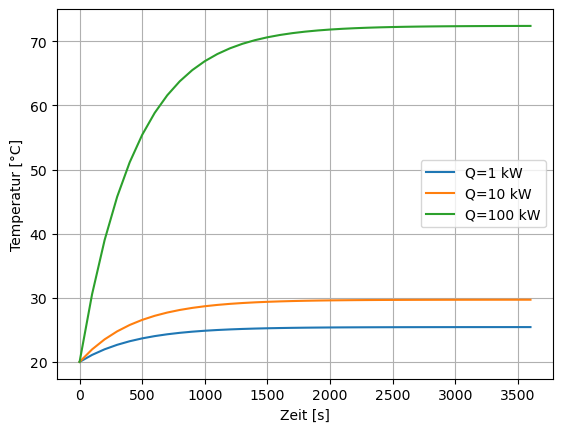

In [8]:
# Erzeugung eines für die "plot_values"-Funktion geeigneten Datensatzes
y_lists = [ [tempv_1, 'Q=1 kW'], [ tempv_2, 'Q=10 kW'], [ tempv_3, 'Q=100 kW'] ]

# und Aufruf der Funktion
plot_values(t_range, y_lists, 
            x_label='Zeit [s]', y_label='Temperatur [°C]')